### 1. Notwendige Bibliotheken importieren

In [93]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

### 2. Titanic-Datensatz laden

In [94]:
df = sns.load_dataset('titanic')

### 3. EDA: Erste Datenübersicht

In [95]:
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


#### 4. Describe-Funktion: 
##### Mit der Funktion lassen wir uns einfach statistische Werte wie Durchschnitt, Standardabweichungen usw. ausgeben

In [96]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### 5. .info: Allgemeine Informationen zum Datensatz
##### Es zeigt uns welcher Datentyp sich in jeder Spalte verbirgt und wie viele Daten fehlen

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


##### Hier kann man gut erkennen dass einige interessante Daten nicht vollständig sind.
- 177 Altersangaben (age)
- 3 mal eingeschiffte Personen (embarked) sowie die dazu gehörige Stadt (embark_town) 
- 688 mal die Decknummer (deck) der Passagiere

#### 6. Die vorhanden Daten bereinigen und die Informationen aus dem src ziehen
##### Die Daten vor der Bereinigung

In [98]:
import sys
sys.path.append("../src")  # Den Ordner "src" zum Python-Pfad hinzufügen

from datenvorbereitung import lade_titanic_daten, bereinige_daten, vergleiche_daten

# Originaldaten laden
df_original = lade_titanic_daten()

# Bereinigte Daten erhalten
df_bereinigt = bereinige_daten(df_original)

# Unterschiede anzeigen
vergleiche_daten(df_original, df_bereinigt)

# Erste Zeilen ausgeben, um den Vergleich visuell zu überprüfen
df_original.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


##### Altersgruppe mit einpflegen

In [99]:
# Altersgruppen erstellen
df_bereinigt['age_group'] = pd.cut(df['age'], bins=[0, 12, 18, 30, 40, 50, 60, 80], labels=['0-12', '13-18', '19-30', '31-40', '41-50', '51-60', '61+'])

##### Die Daten nach der Bereinigung

In [100]:
df_bereinigt.head(10)

,survived,pclass,age,sibsp,parch,fare,who,embark_town,age_group
0,0,3,22.0,1,0,7.2500,man,Southampton,19-30
1,1,1,38.0,1,0,71.2833,woman,Cherbourg,31-40
2,1,3,26.0,0,0,7.9250,woman,Southampton,19-30
3,1,1,35.0,1,0,53.1000,woman,Southampton,31-40
4,0,3,35.0,0,0,8.0500,man,Southampton,31-40
5,0,3,28.0,0,0,8.4583,man,Queenstown,NaN
6,0,1,54.0,0,0,51.8625,man,Southampton,51-60
7,0,3,2.0,3,1,21.0750,child,Southampton,0-12
8,1,3,27.0,0,2,11.1333,woman,Southampton,19-30
9,1,2,14.0,1,0,30.0708,child,Cherbourg,13-18


##### Entfernte Spalten und Begründung

| **Spalte**      | **Grund für Entfernung** |
|----------------|----------------------|
| `embarked`  | Redundant – die Spalte `embark_town` enthält bereits die gleiche Information. |
| `alive`        | Redundant – die Spalte `survived` enthält bereits die Überlebensinformationen (1 = überlebt, 0 = nicht überlebt). |
| `deck`         | Viele fehlende Werte – enthält sehr viele `NaN`-Werte, sodass die Information nicht zuverlässig genutzt werden kann. |
| `class`        | Redundant – `pclass` enthält bereits die gleiche Information numerisch (1, 2, 3 statt "First", "Second", "Third"). |
| `sex`          | Ersetzt durch `who`, um zwischen Kindern und Erwachsenen zu unterscheiden ("man", "woman", "child"). |
| `adult_male`   | Redundant – Diese Information kann bereits aus `who` abgeleitet werden und ist nicht relevant. |
| `alone`        | Redundant – Diese Information kann aus `sibsp` (Anzahl Geschwister/Ehepartner) und `parch` (Anzahl Eltern/Kinder) berechnet werden. |

#### 7. Überlebensrate auf der Titanic
##### Prozentualer Anteil der Überlebenden

In [101]:
survival_counts = df_bereinigt['survived'].value_counts()
survival_rate = (survival_counts[1] / survival_counts.sum()) * 100

print(f"Die Gesamtüberlebensrate beträgt: {survival_rate:.2f}%")

Die Gesamtüberlebensrate beträgt: 38.38%


##### 7.1 Generelle Überlebensrate nach Personengruppen und Altersgruppen

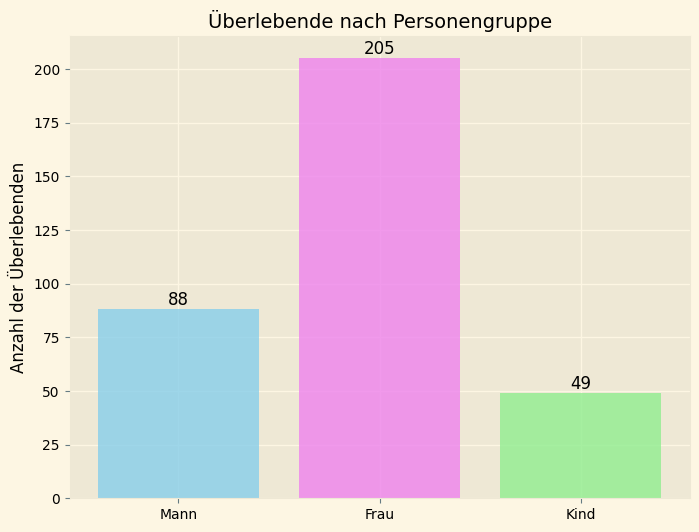

In [102]:
# Absolute Anzahl der Überlebenden pro Gruppe
survived_man = df_bereinigt[df_bereinigt["who"] == "man"]["survived"].sum()
survived_woman = df_bereinigt[df_bereinigt["who"] == "woman"]["survived"].sum()
survived_child = df_bereinigt[df_bereinigt["who"] == "child"]["survived"].sum()

# Balkendiagramm erstellen
plt.figure(figsize=(8, 6))
plt.bar(
    ["Mann", "Frau", "Kind"],
    [survived_man, survived_woman, survived_child],
    color=["skyblue", "violet", "lightgreen"],
    alpha=0.8
)

# Titel und Achsenbeschriftungen
plt.title("Überlebende nach Personengruppe", fontsize=14, color = "black")
plt.ylabel("Anzahl der Überlebenden", fontsize=12, color= "black")
plt.xticks(color = "black")
plt.yticks(color = "black")

# Werte über den Balken anzeigen
for i, v in enumerate([survived_man, survived_woman, survived_child]):
    plt.text(i, v + 2, str(v), ha="center", fontsize=12)

# Diagramm speichern
output_path = os.path.join("..", "results", "survival_rate_by_gender.png")

# Bild speichern
plt.savefig(output_path)

# Diagramm anzeigen
plt.show()

#### Altersgruppen

In [103]:
grouped_data = df_bereinigt.groupby('embark_town')['age_group'].value_counts().unstack()

grouped_data

age_group,0-12,13-18,19-30,31-40,41-50,51-60,61+
embark_town,,,,,,,
Cherbourg,11,17,46,25,16,12,3
Queenstown,4,4,8,7,2,1,2
Southampton,54,49,216,123,68,29,17


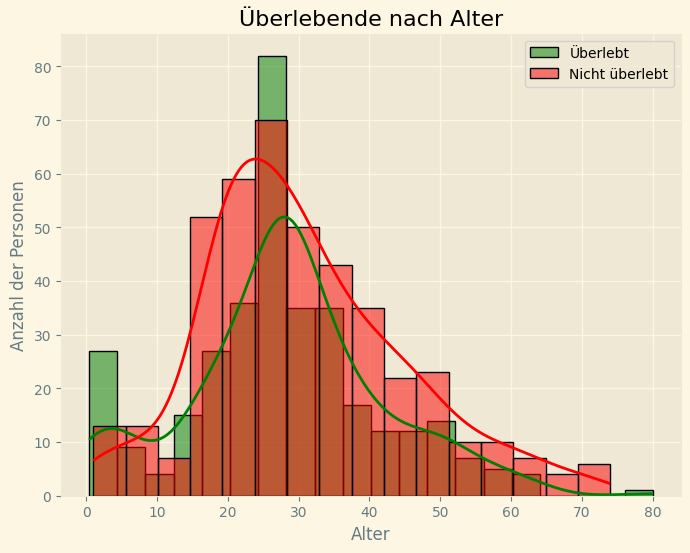

In [104]:
plt.figure(figsize=(8, 6))
sns.histplot(df_bereinigt[df_bereinigt['survived'] == 1]['age'], kde=True, color='green', label='Überlebt', stat='count')
sns.histplot(df[df['survived'] == 0]['age'], kde=True, color='red', label='Nicht überlebt', stat='count')
plt.title('Überlebende nach Alter')
plt.xlabel('Alter')
plt.ylabel('Anzahl der Personen')
plt.legend()

# Diagramm speichern
output_path = os.path.join("..", "results", "survival_rate_by_age.png")

# Bild speichern
plt.savefig(output_path)

# Diagramm anzeigen
plt.show()

##### 7.2 Überlebensrate nach Einstiegshafen und Altersgruppe

C:\Users\Admin\AppData\Local\Temp\ipykernel_5324\3187821909.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df_bereinigt.groupby(['embark_town', 'age_group'])['survived'].mean().unstack().mul(100).round(2)


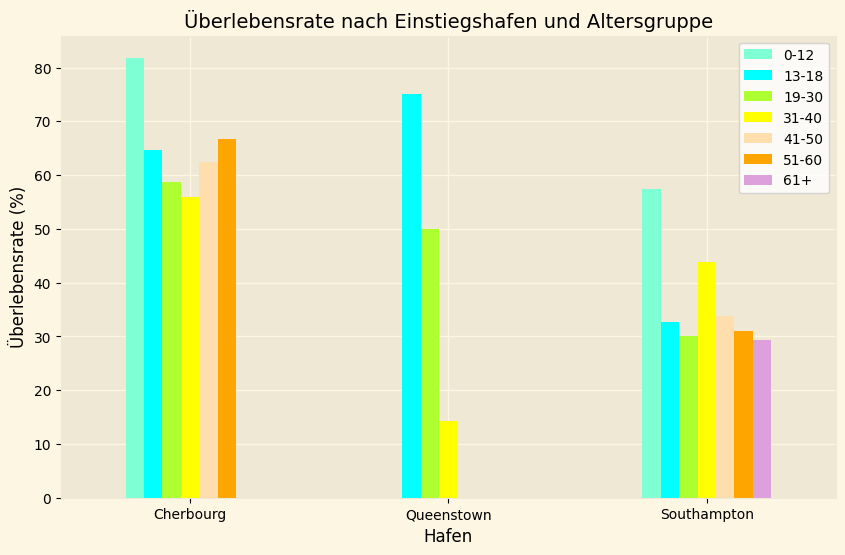

In [ ]:
grouped_data = df_bereinigt.groupby(['embark_town', 'age_group'])['survived'].mean().unstack().mul(100).round(2)

grouped_data.plot(kind='bar', color=['aquamarine', 'cyan', 'greenyellow', 'yellow', 'navajowhite', 'orange', 'plum'], figsize=(10, 6))


plt.style.use('Solarize_Light2')
plt.title('Überlebensrate nach Einstiegshafen und Altersgruppe', fontsize=14)
plt.xlabel('Hafen', fontsize=12, color = "black" )
plt.ylabel('Überlebensrate (%)', fontsize=12, color = "black")
plt.legend(facecolor='white')
plt.xticks(rotation=0)

# Achsenticks schwarz einfärben
plt.tick_params(axis='x', colors='black')  # x-Achse in Schwarz
plt.tick_params(axis='y', colors='black')  # y-Achse in Schwarz

# Diagramm / Bild speichern
output_path = os.path.join("..", "results", "survival_by_embarked_age_group.png")
plt.savefig(output_path)

plt.show()

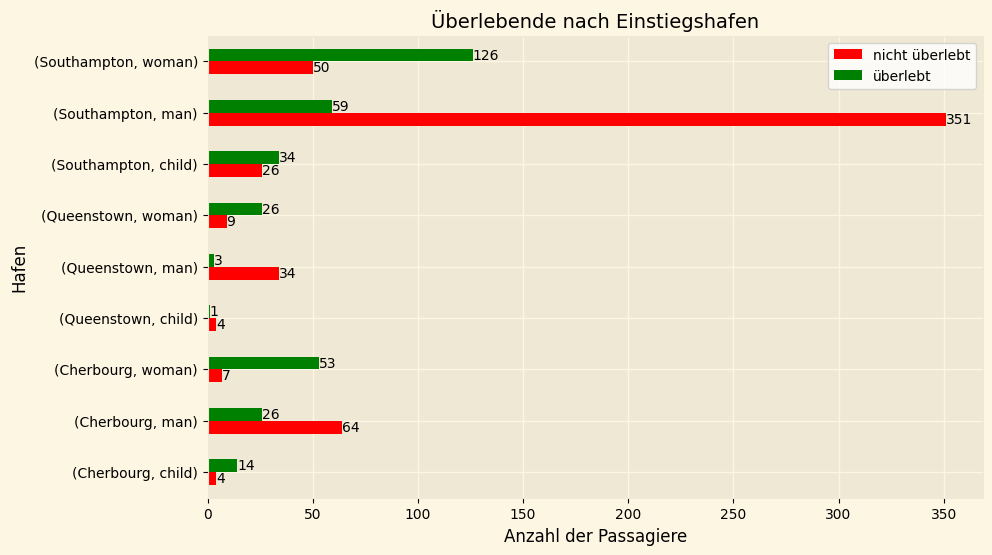

In [115]:
grouped_data = df_bereinigt.groupby(['embark_town', 'who'])['survived'].value_counts().unstack()

ax = grouped_data.plot(kind='barh', color=['red', 'green'], figsize=(10, 6))

# Zahlen auf den Balken anzeigen
ax.bar_label(ax.containers[0], label_type='edge', color='black', fontsize=10)
ax.bar_label(ax.containers[1], label_type='edge', color='black', fontsize=10)

ax.set_title('Überlebende nach Einstiegshafen', fontsize=14)
ax.set_ylabel('Hafen', fontsize=12, color = "black")
ax.set_xlabel('Anzahl der Passagiere', fontsize=12, color= "black")
plt.style.use('Solarize_Light2')
plt.legend(['nicht überlebt', 'überlebt'], facecolor='white')
plt.xticks(rotation=0)

# Achsenticks schwarz einfärben
plt.tick_params(axis='x', colors='black')  # x-Achse in Schwarz
plt.tick_params(axis='y', colors='black')  # y-Achse in Schwarz

# Diagramm / Bild speichern
output_path = os.path.join("..", "results", "survival_by_embark_town.png")
plt.savefig(output_path)

plt.show()

##### 7.3 Überlebende nach Passagierklassen (Klasse 1 bis Klasse 3)

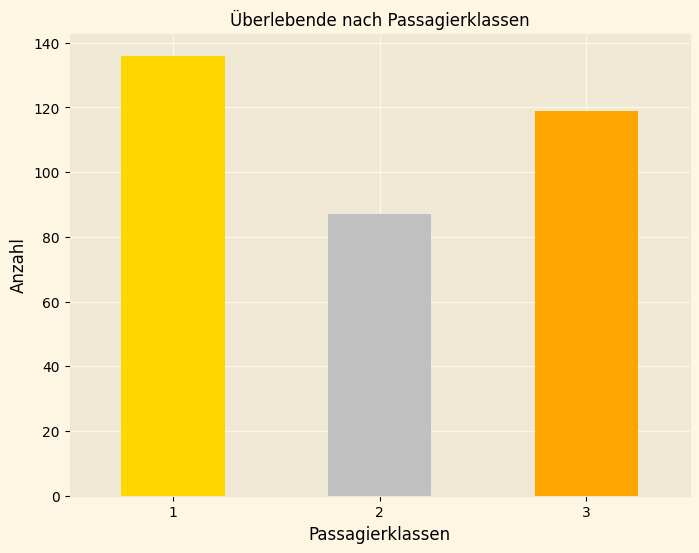

In [118]:

# Überlebende nach Passagierklasse berechnen
survived_pclass = df_bereinigt.groupby(['pclass'])['survived'].sum()

# Stil setzen
plt.style.use('Solarize_Light2')

# Direkt Farben als Liste angeben (sicherstellen, dass sie in der richtigen Reihenfolge sind)
farben = ['gold', 'silver', 'orange']  

# Balkendiagramm erstellen
ax = survived_pclass.plot(kind="bar", figsize=(8, 6), color=farben, rot=0)

# Titel und Achsenbeschriftungen setzen
ax.set_title('Überlebende nach Passagierklassen', fontsize=12)
ax.set_xlabel('Passagierklassen', color="black")
ax.set_ylabel('Anzahl', color="black")

# Achsenticks schwarz einfärben
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

# Diagramm / Bild speichern
output_path = os.path.join("..", "results", "Ueberlebende_nach_Passagierklassen_1_Anzahl.png")
plt.savefig(output_path)

# Diagramm anzeigen
plt.show()


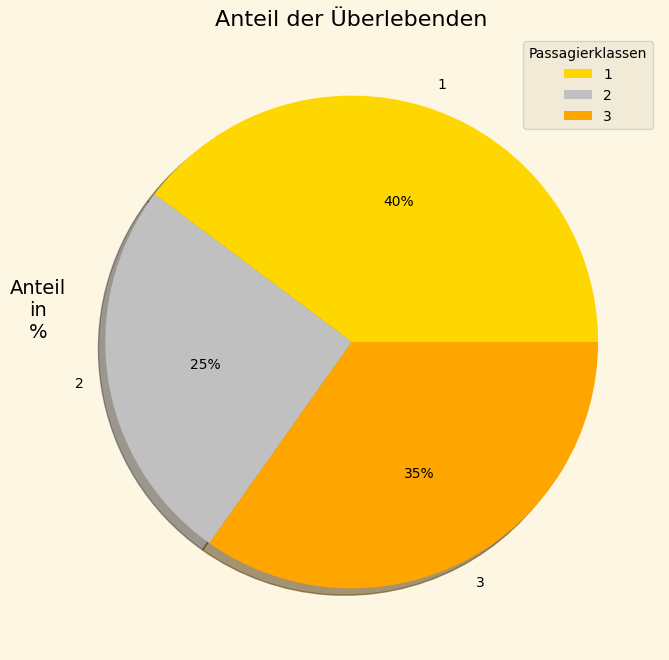

In [120]:
# Ueberlebende_nach_Passagierklassen_Anteil_in_Prozent
grouped_alive_df = df_bereinigt.groupby(['pclass'])['survived'].sum()
plt.style.use('Solarize_Light2')
grouped_alive_df.plot(kind="pie", colors=['gold', 'silver', 'orange'], figsize=(10,8), subplots=True, shadow=True, autopct='%1.0f%%')
plt.title('Anteil der Überlebenden', fontsize=16)
plt.ylabel(ylabel='Anteil\nin\n%', loc='center', fontsize=14, rotation=0, color = "black")
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.legend(title="Passagierklassen", labels=['1', '2', '3'], fontsize=10)

# Diagramm / Bild speichern
output_path = os.path.join("..", "results", "Ueberlebende_nach_Passagierklassen_2_Anteil.png")
plt.savefig(output_path)

plt.show()

##### 7.4 Passagiere mit Familien (sibsp, parch)

C:\Users\Admin\AppData\Local\Temp\ipykernel_5324\1804638253.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_parch["Kategorie"], y=df_parch["Anzahl"], palette="crest")


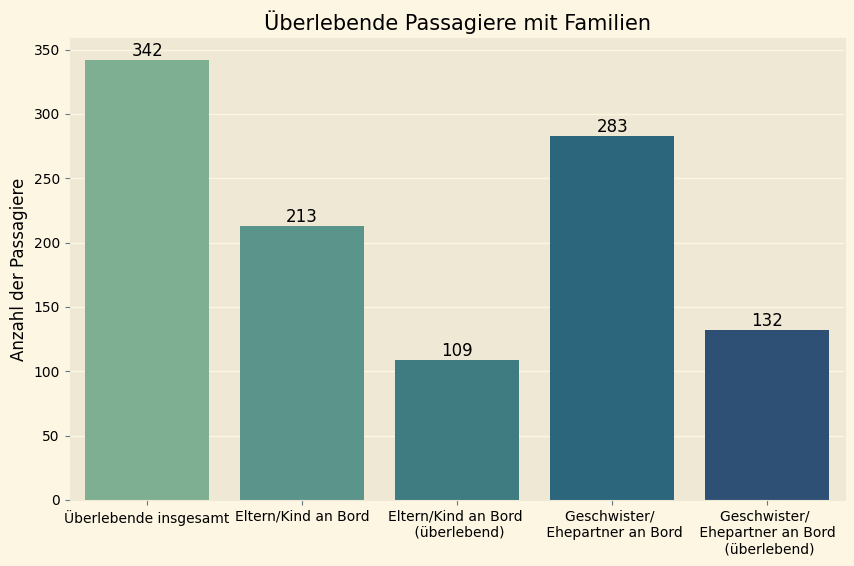

In [122]:
### Analyse der "parch" und "sibsp" - Spalte:

sibsp = (df_bereinigt["sibsp"] >= 1).sum() 
survived_sibsp = df.query("survived == 1 & sibsp >= 1")["survived"].sum()

insgesamt_survived = df_bereinigt["survived"].sum()    
parch = (df_bereinigt["parch"] >= 1).sum()
survived_parch = df_bereinigt.query("survived == 1 & parch >= 1")["survived"].sum()

df_parch = pd.DataFrame({
    "Kategorie": ["Überlebende insgesamt","Eltern/Kind an Bord", "Eltern/Kind an Bord \n (überlebend)",
                  "Geschwister/ \n Ehepartner an Bord", "Geschwister/ \n Ehepartner an Bord \n (überlebend)"],
    "Anzahl": [insgesamt_survived, parch, survived_parch, sibsp, survived_sibsp]
})

plt.figure(figsize=(10, 6))

sns.barplot(x=df_parch["Kategorie"], y=df_parch["Anzahl"], palette="crest")

plt.title("Überlebende Passagiere mit Familien", color="black", fontsize=15)
plt.ylabel("Anzahl der Passagiere", color="black")
plt.xlabel("")
plt.xticks(color="black")
plt.yticks(color="black")

for i, v in enumerate(df_parch["Anzahl"]):
    plt.text(i, v + 3, str(v), ha="center", fontsize=12, color="black")

# Diagramm / Bild speichern
output_path = os.path.join("..", "results", "survival_passenger_with_family.png")
plt.savefig(output_path)

plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_5324\490947247.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_parch["Kategorie"], y=df_parch["Anzahl"], palette= "crest")


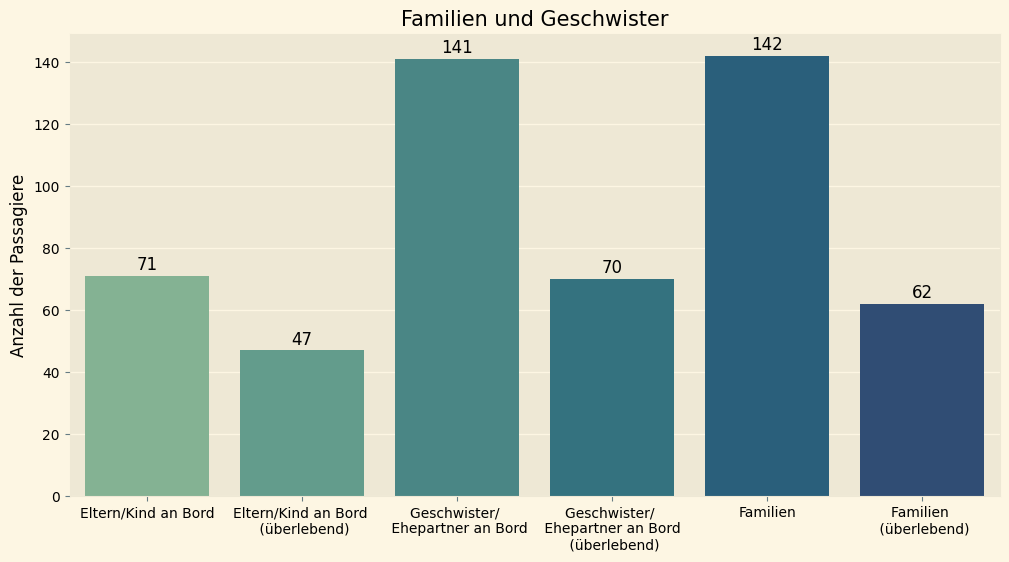

In [124]:
### Analys "parch", "sibsp" und beides Spalte zusammen:

beides_gruppe = df_bereinigt.query("parch >= 1 & sibsp >= 1").shape[0]
survived_beides_gruppe = df_bereinigt.query("parch >= 1 & sibsp >= 1 & survived == 1")["survived"].sum()

korrigierte_passagiere_parch = parch - beides_gruppe
korrigierte_survived_parch = survived_parch - survived_beides_gruppe

korrigierte_passagiere_sibsp = sibsp - beides_gruppe
korrigierte_survived_sibsp = survived_sibsp - survived_beides_gruppe

df_parch = pd.DataFrame({
    "Kategorie": ["Eltern/Kind an Bord", "Eltern/Kind an Bord \n (überlebend)",
                  "Geschwister/ \n Ehepartner an Bord", "Geschwister/ \n Ehepartner an Bord \n (überlebend)",
                  "Familien", "Familien \n (überlebend)"
    ],
    "Anzahl": [korrigierte_passagiere_parch, korrigierte_survived_parch,
               korrigierte_passagiere_sibsp, korrigierte_survived_sibsp,  beides_gruppe, survived_beides_gruppe
    ]
})

plt.figure(figsize=(12, 6))
sns.barplot(x=df_parch["Kategorie"], y=df_parch["Anzahl"], palette= "crest")

plt.ylabel("Anzahl der Passagiere", color="black")
plt.xlabel("")
plt.title("Familien und Geschwister", color="black", fontsize=15)
plt.xticks(color="black")
plt.yticks(color="black")

for i, v in enumerate(df_parch["Anzahl"]):
    plt.text(i, v + 2, str(v), ha="center", fontsize=12, color="black")

# Diagramm / Bild speichern
output_path = os.path.join("..", "results", "family_sibsp.png")
plt.savefig(output_path)

plt.show()

##### 7.5 Vergleich zwischen Familienreisenden und Alleinreisenden

C:\Users\Admin\AppData\Local\Temp\ipykernel_5324\2791177628.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_insgesamt_reisender ["Kategorie"], y=df_insgesamt_reisender ["Anzahl"], palette="crest")


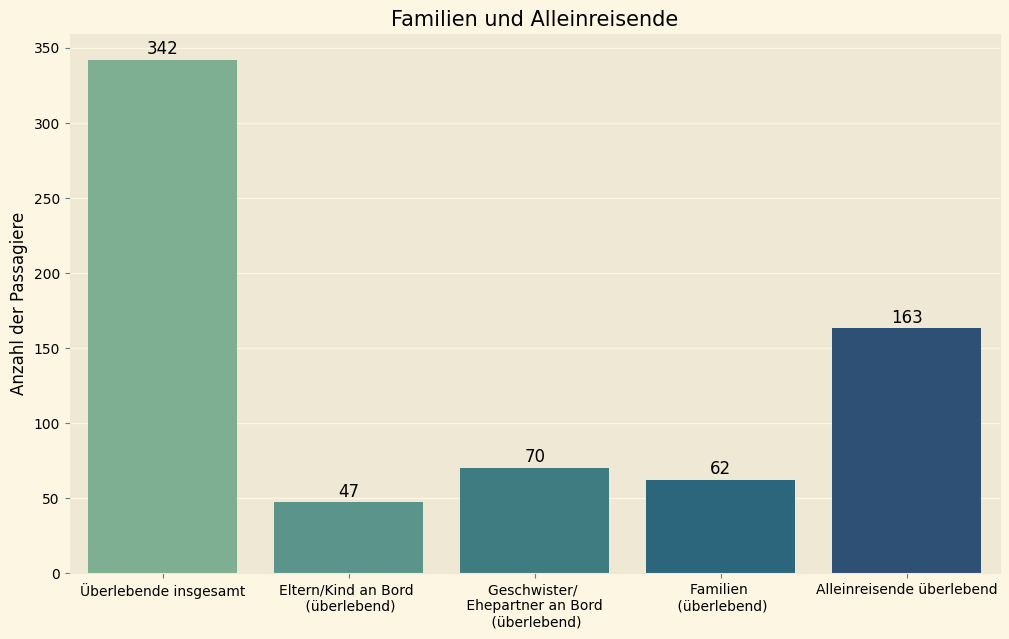

In [127]:
insgesamt_survived = df_bereinigt["survived"].sum() 
survived_alein_resender = df_bereinigt.query("parch == 0 & sibsp == 0")["survived"].sum()

df_insgesamt_reisender = pd.DataFrame({
    "Kategorie": ["Überlebende insgesamt","Eltern/Kind an Bord \n (überlebend)",
                  "Geschwister/ \n Ehepartner an Bord \n (überlebend)",
                  "Familien \n (überlebend)", "Alleinreisende überlebend"        
    ],
    "Anzahl": [insgesamt_survived, korrigierte_survived_parch , korrigierte_survived_sibsp,
               survived_beides_gruppe, survived_alein_resender   
    ]
})

plt.figure(figsize=(12, 7))
sns.barplot(x=df_insgesamt_reisender ["Kategorie"], y=df_insgesamt_reisender ["Anzahl"], palette="crest")

for i, v in enumerate(df_insgesamt_reisender ["Anzahl"]): 
    plt.text(i, v + 4, str(v), ha="center", fontsize=12, color="black")

plt.ylabel("Anzahl der Passagiere", color="black")
plt.xlabel("")
plt.yticks(color="black")
plt.xticks(color="black")
plt.title("Familien und Alleinreisende", color="black", fontsize=15)

# Diagramm / Bild speichern
output_path = os.path.join("..", "results", "family_alone.png")
plt.savefig(output_path)

plt.show()

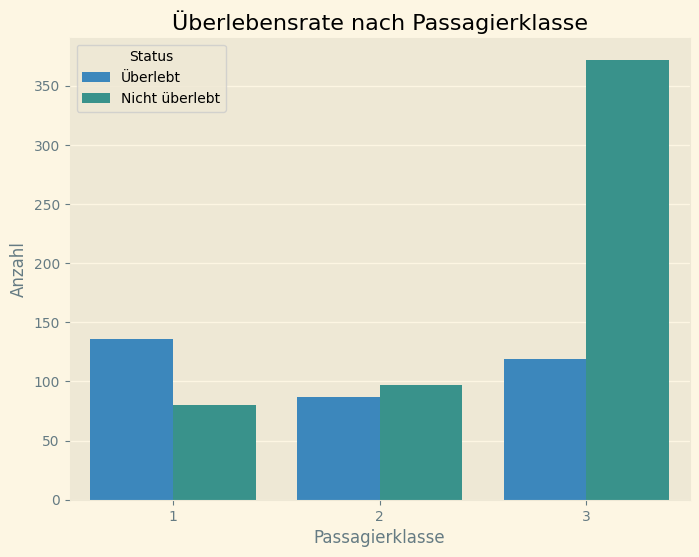

In [112]:
plt.figure(figsize=(8, 6))
sns.countplot(x='pclass', hue=df_bereinigt['survived'].map({0: 'Nicht überlebt', 1: 'Überlebt'}), data=df_bereinigt)
plt.title('Überlebensrate nach Passagierklasse')
plt.xlabel('Passagierklasse')
plt.ylabel('Anzahl')
plt.legend(title='Status')

# Diagramm speichern als PNG
plt.savefig(r'C:\Users\Admin\Documents\Woche_16_10.03.25-14.03.25\10.03.25\titanic_analysis\results\survival_rate_by_class.png')

# Diagramm anzeigen
plt.show()